In [48]:
import pandas as pd


In [49]:
#load the dataset
df = pd.read_csv('house Prediction Data Set.csv')
df.head()


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [50]:
import os

# This prints the folder Python is currently working in
print("Current Folder:", os.getcwd())

# This lists every file Python can see in that folder
print("\nFiles found here:")
print(os.listdir())


Current Folder: C:\Users\shubh\OneDrive\Documents\Codeveda_Internship\Task_1_HousePrediction

Files found here:
['.ipynb_checkpoints', 'house Prediction Data Set.csv', 'Task_1_HousePrediction.ipynb']


In [51]:
# List all column names to find the target variable
print(df.columns)

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')


In [52]:
#reload the dataset 
df = pd.read_csv('house Prediction Data Set.csv',header = None)

In [53]:
# 2. Transpose the description table (swaps rows/columns) 
# This makes it much easier to read when you have 20+ columns!
pd.set_option('display.max_rows', None)  # Show all rows
display(df.describe().T)

,count,unique,top,freq
0,506,506,0.04741 0.00 11.930 0 0.5730 6.0300 80...,1


In [54]:
print(df.shape)


(506, 1)


# LOAD THE DATASET

In [55]:
# The argument sep='\s+' tells Pandas: 
# "Split the data whenever you see one or more spaces"
df = pd.read_csv('house Prediction Data Set.csv', header=None, sep='\s+')

# Now check the shape again
print("New Shape:", df.shape)
df.head()

New Shape: (506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## OBJECTIVE---
Performing basic cleaning and prerocessing of data
Steps:
1. Check out for missing data, handle the missing data if any
2. Check for outliers
3. Scale out data
4. Categorical data handling.
5. Correlation of our variables.
   Resources :Python libraries(anas,numy,matlotlib and seaborn)
   Data: Boston Housing

In [56]:
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: C:\Users\shubh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# IMPORTING MODULES



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


# DATASET INFORMATION
  

In [59]:
# Assign meaningful column names
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

df.columns = column_names

# Check the head again to see the new names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [60]:
df.shape


(506, 14)

In [61]:
df.describe()
#statistical characteristics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [62]:
df.info()  #GIVES DATATYPE INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Pairplot = "Show me the dots" (Visual Check)
What it does: It draws every single data point.

Why use it? To see the shape of the data.

Are the dots forming a straight line? (Linear relationship)

Are there random dots far away? (Outliers)

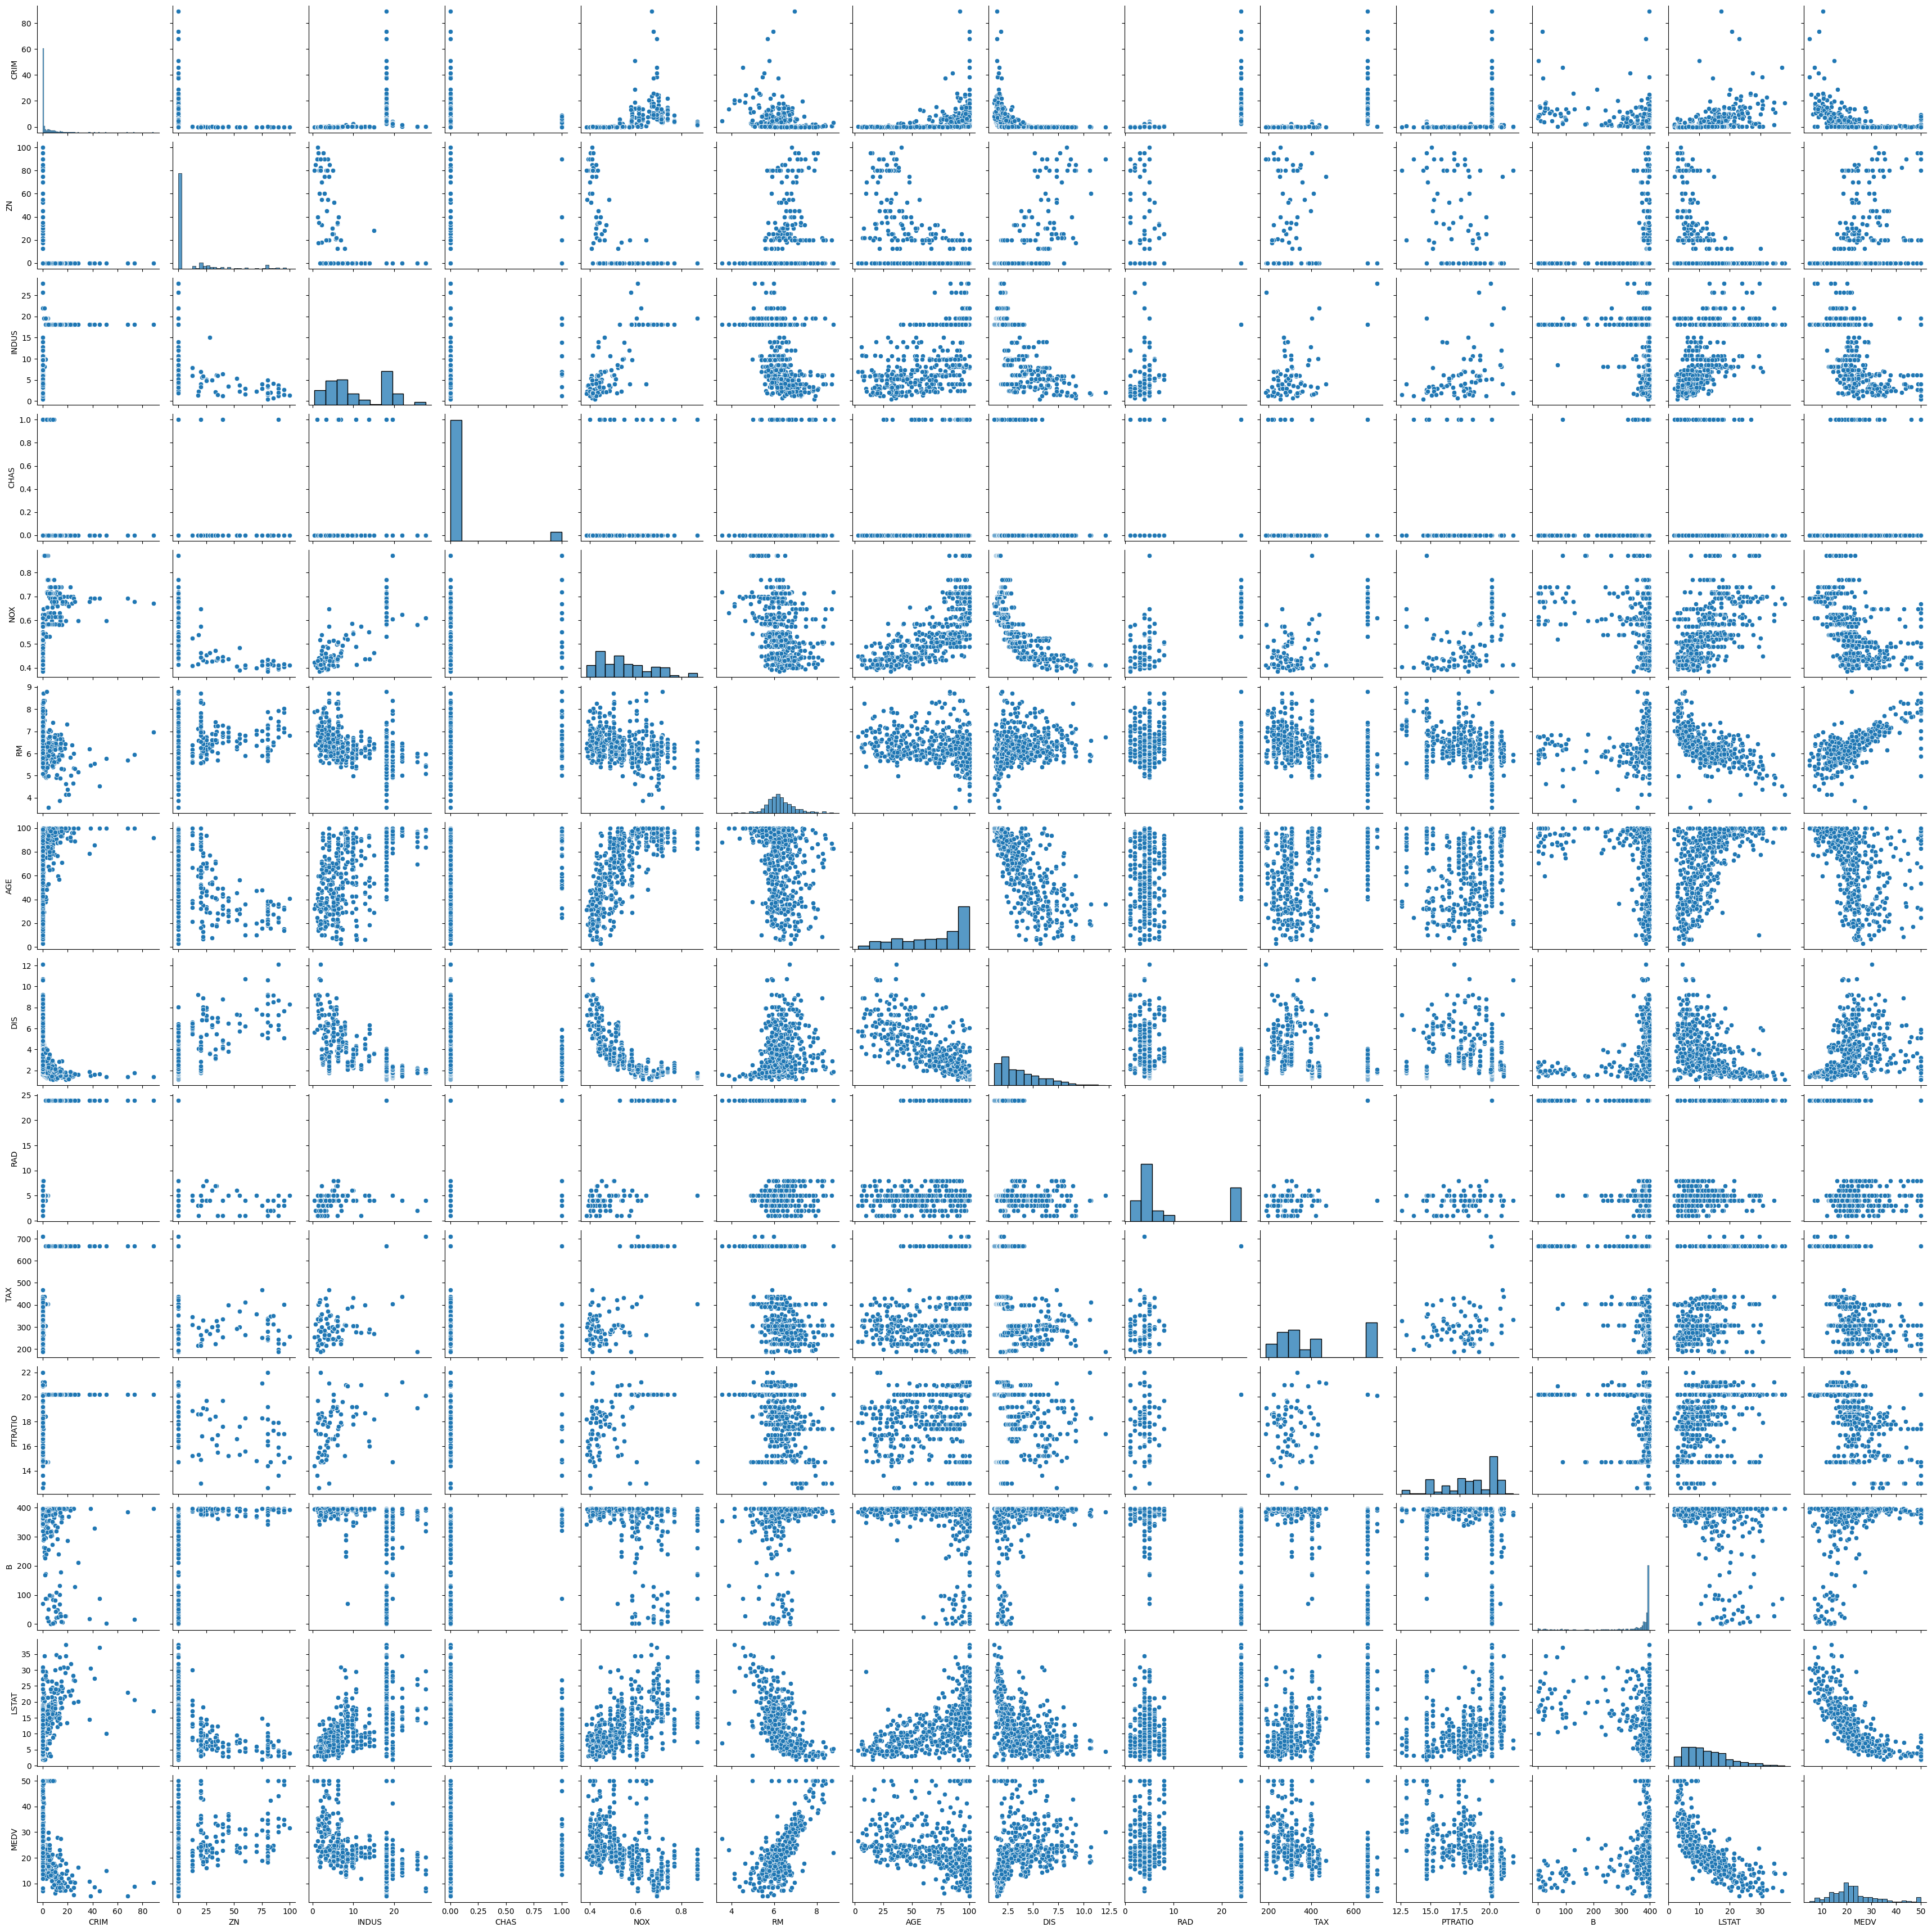

In [63]:
#Outlier detection and handling
sns.pairplot(df)       

for removingg outliers and data scalin 3 things can be done -----
1. scaling  -> initial sclae 0 to 100 change to-> 0 to 1 
2. normalization 
3. dropping the outlier

# PREPROCESSING THE DATASET


In [64]:
#check for null values
df.isnull().sum()  #have zero null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# EXPLORATORY DATA ANALYSIS

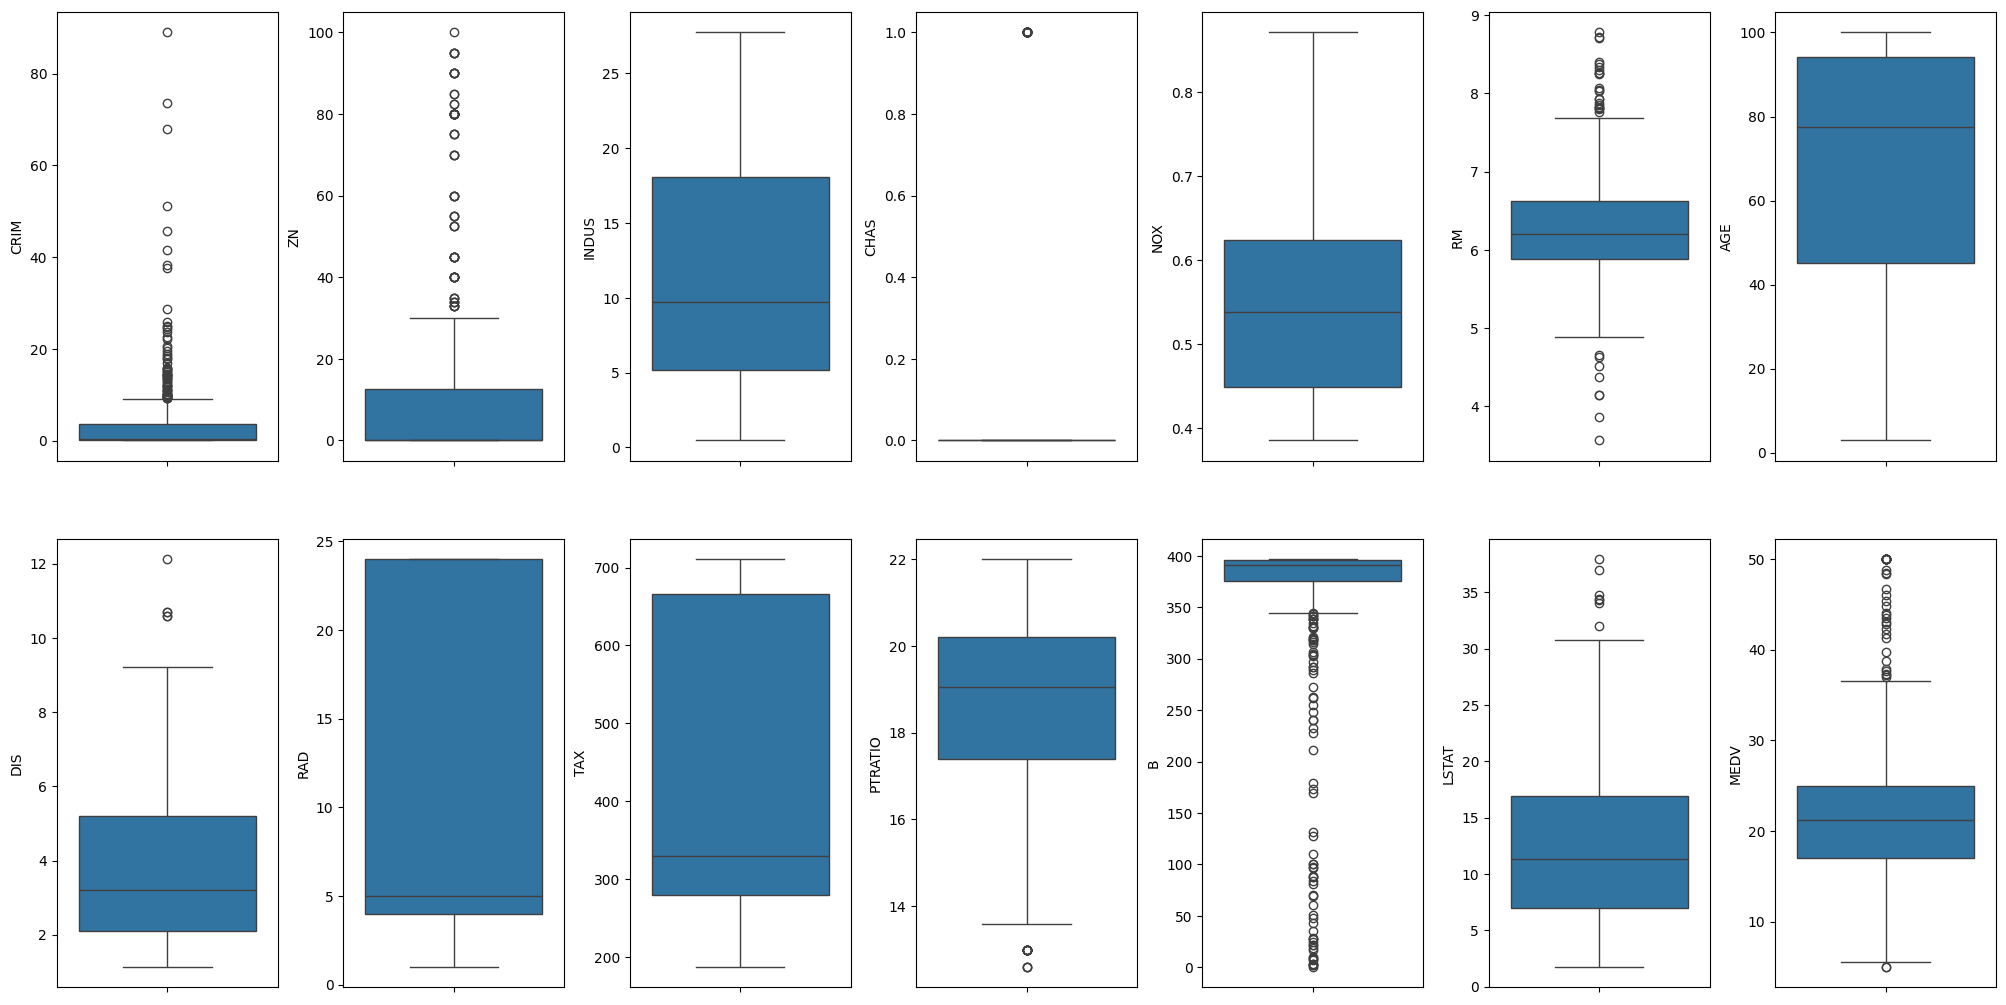

In [65]:
#CREATE BOX PLOT  ->use to identify the outliers
fig, ax = plt.subplots(ncols = 7, nrows = 2 , figsize =(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y= col , data =df , ax = ax[index])
    index +=1
    #hyperparameter tunning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0) 

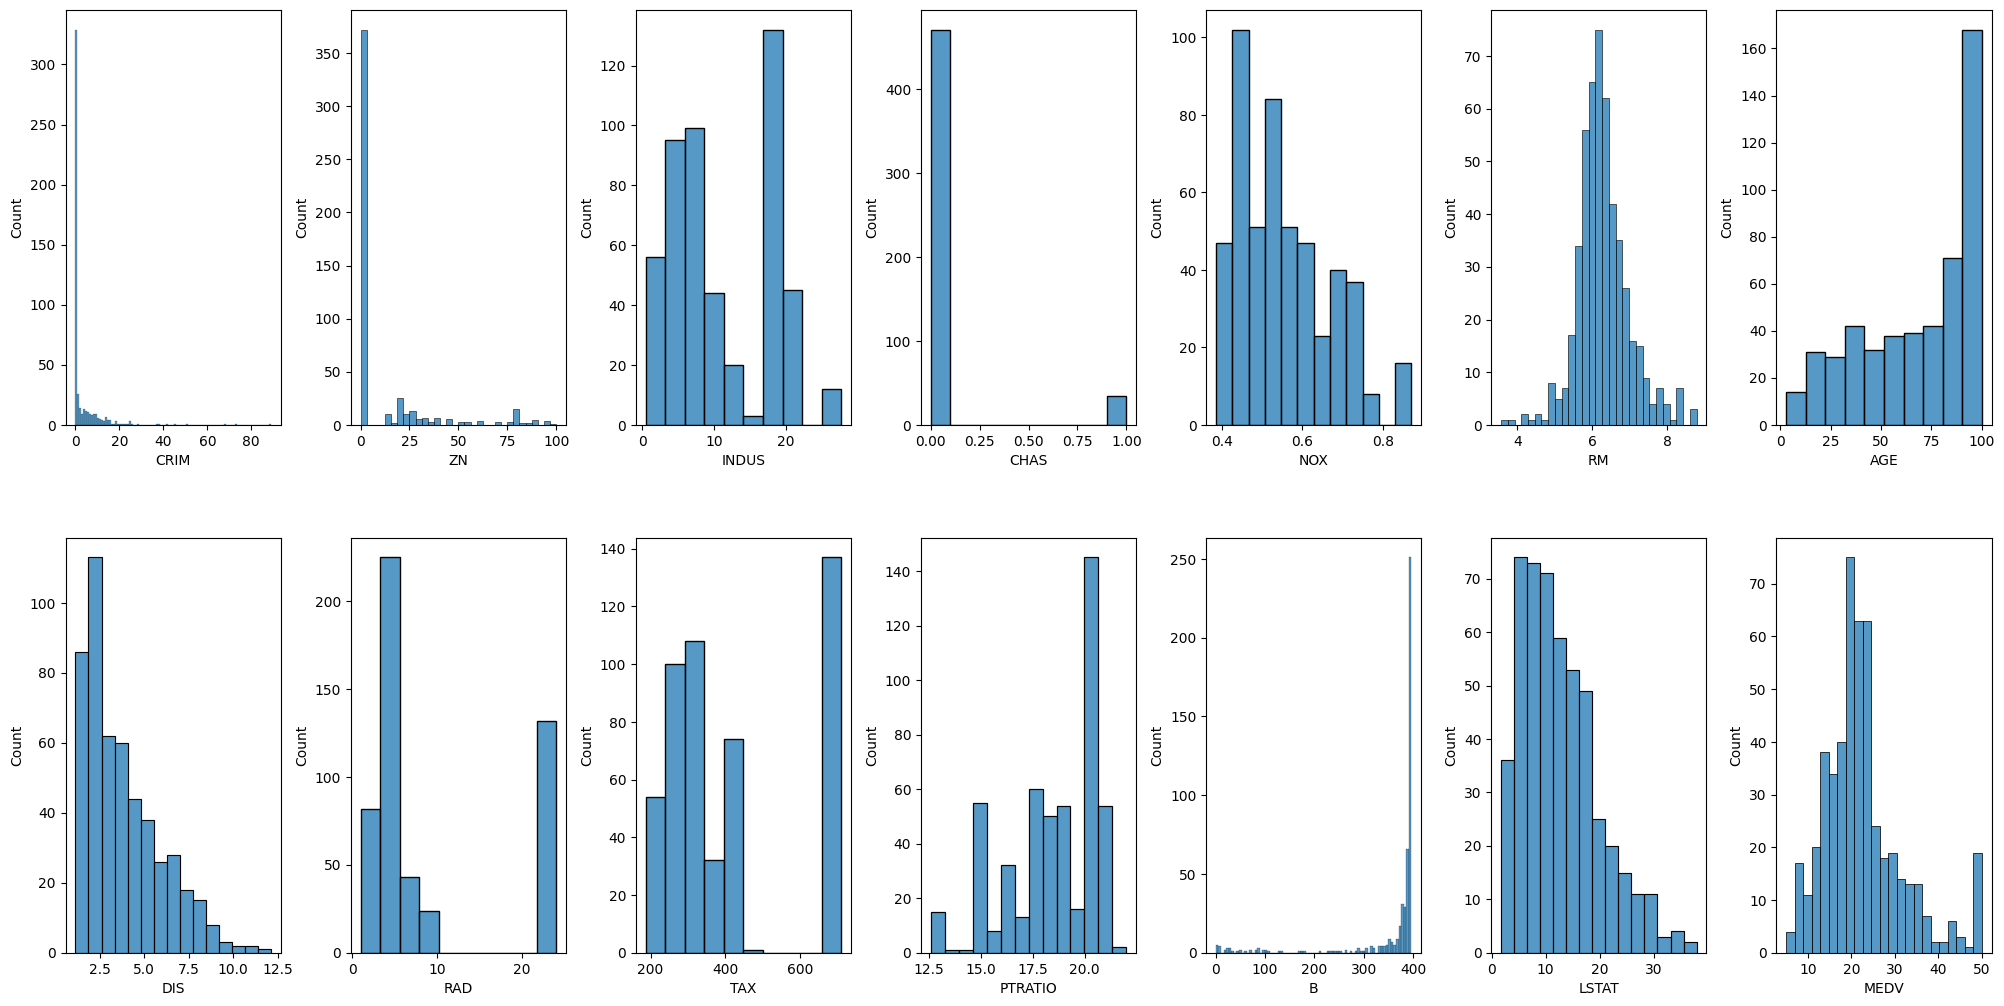

In [66]:
#create dist plot
fig, ax = plt.subplots(ncols = 7, nrows = 2 , figsize =(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value , ax = ax[index])
    index +=1
    #hyperparameter tunning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0) 


##min-max normalization

In [67]:
cols = ['CRIM','ZN','TAX','B']
for col in cols:
    #find min and max of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col]-minimum)/(maximum-minimum) #FORMULA #advantage -all value in 0 to 1

In [68]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


C:\Users\shubh\AppData\Local\Temp\ipykernel_2128\4084051886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value , ax = ax[index])
C:\Users\shubh\AppData\Local\Temp\ipykernel_2128\4084051886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value , ax = ax[index])
C:\Users\shubh\AppData\L

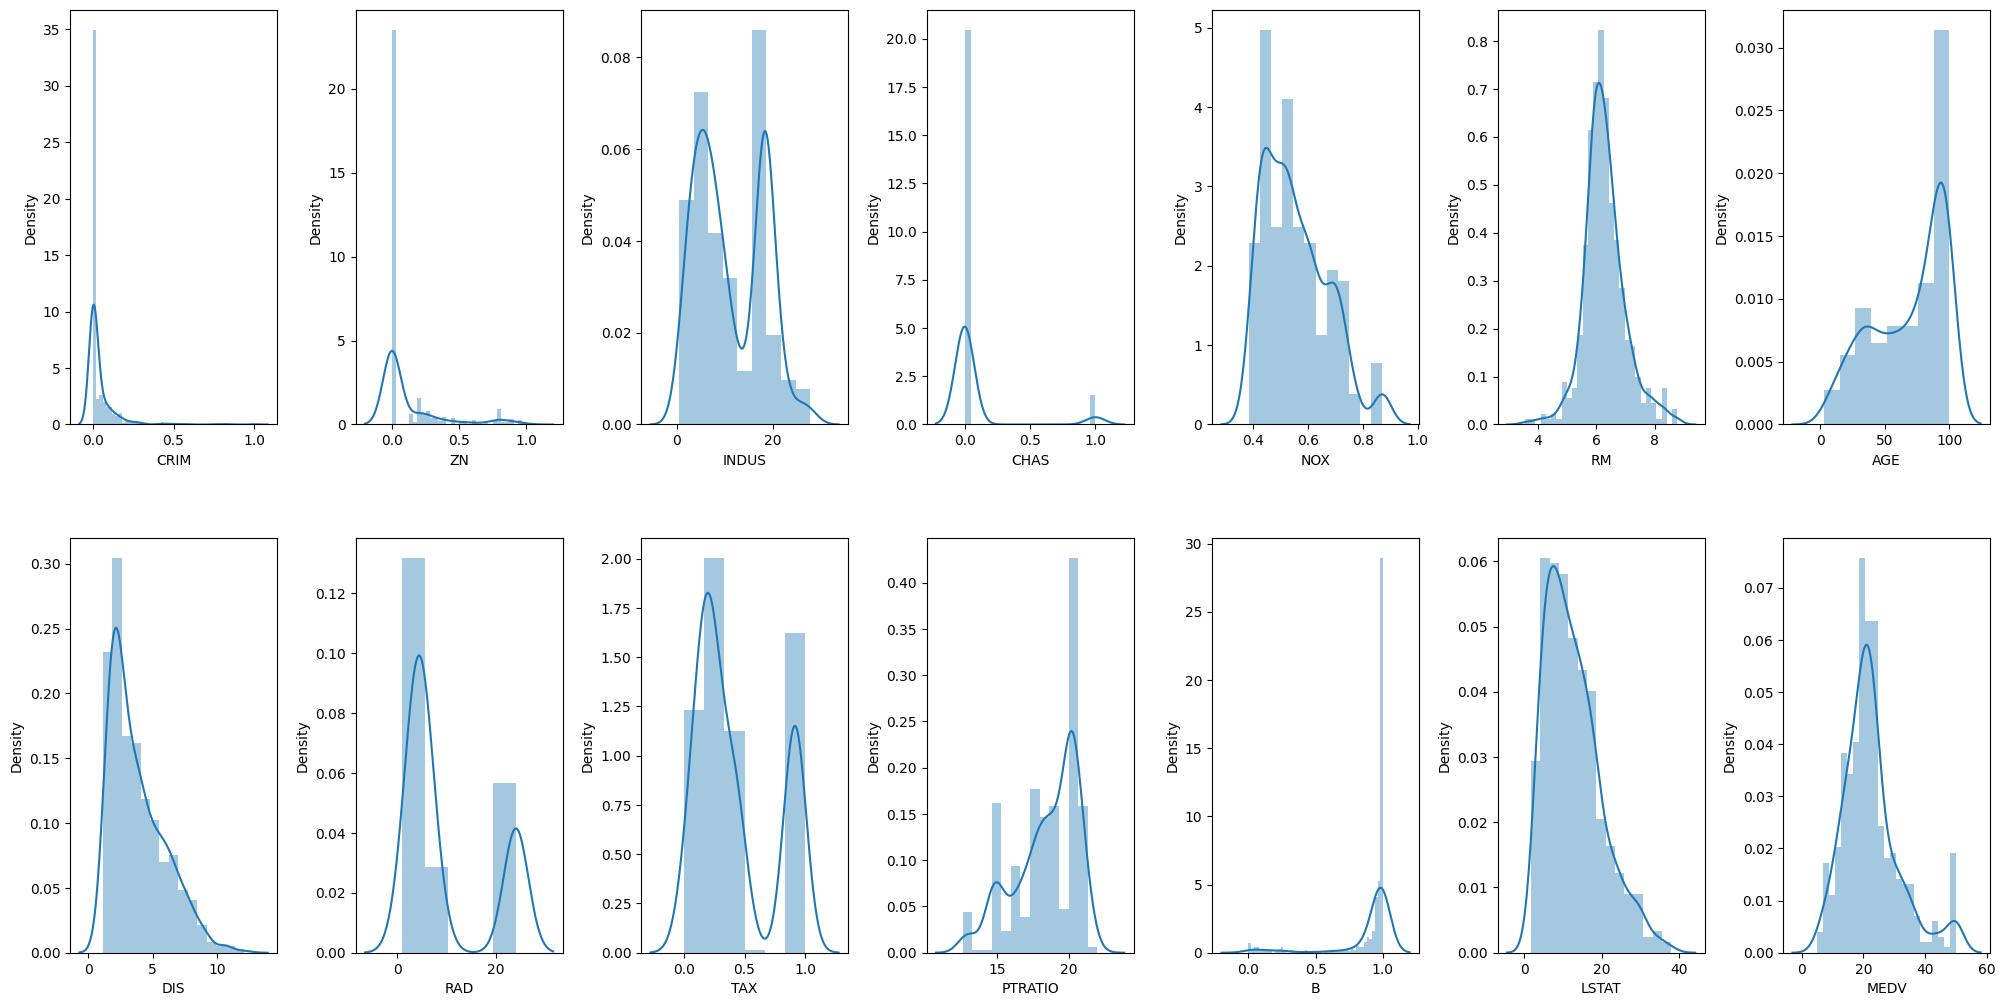

In [69]:
#create dist plot
fig, ax = plt.subplots(ncols = 7, nrows = 2 , figsize =(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value , ax = ax[index])
    index +=1
    #hyperparameter tunning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0) 

In [70]:
#standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [71]:
for col in cols:
    df[col]=scaled_cols[col]

C:\Users\shubh\AppData\Local\Temp\ipykernel_2128\4084051886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value , ax = ax[index])
C:\Users\shubh\AppData\Local\Temp\ipykernel_2128\4084051886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value , ax = ax[index])
C:\Users\shubh\AppData\L

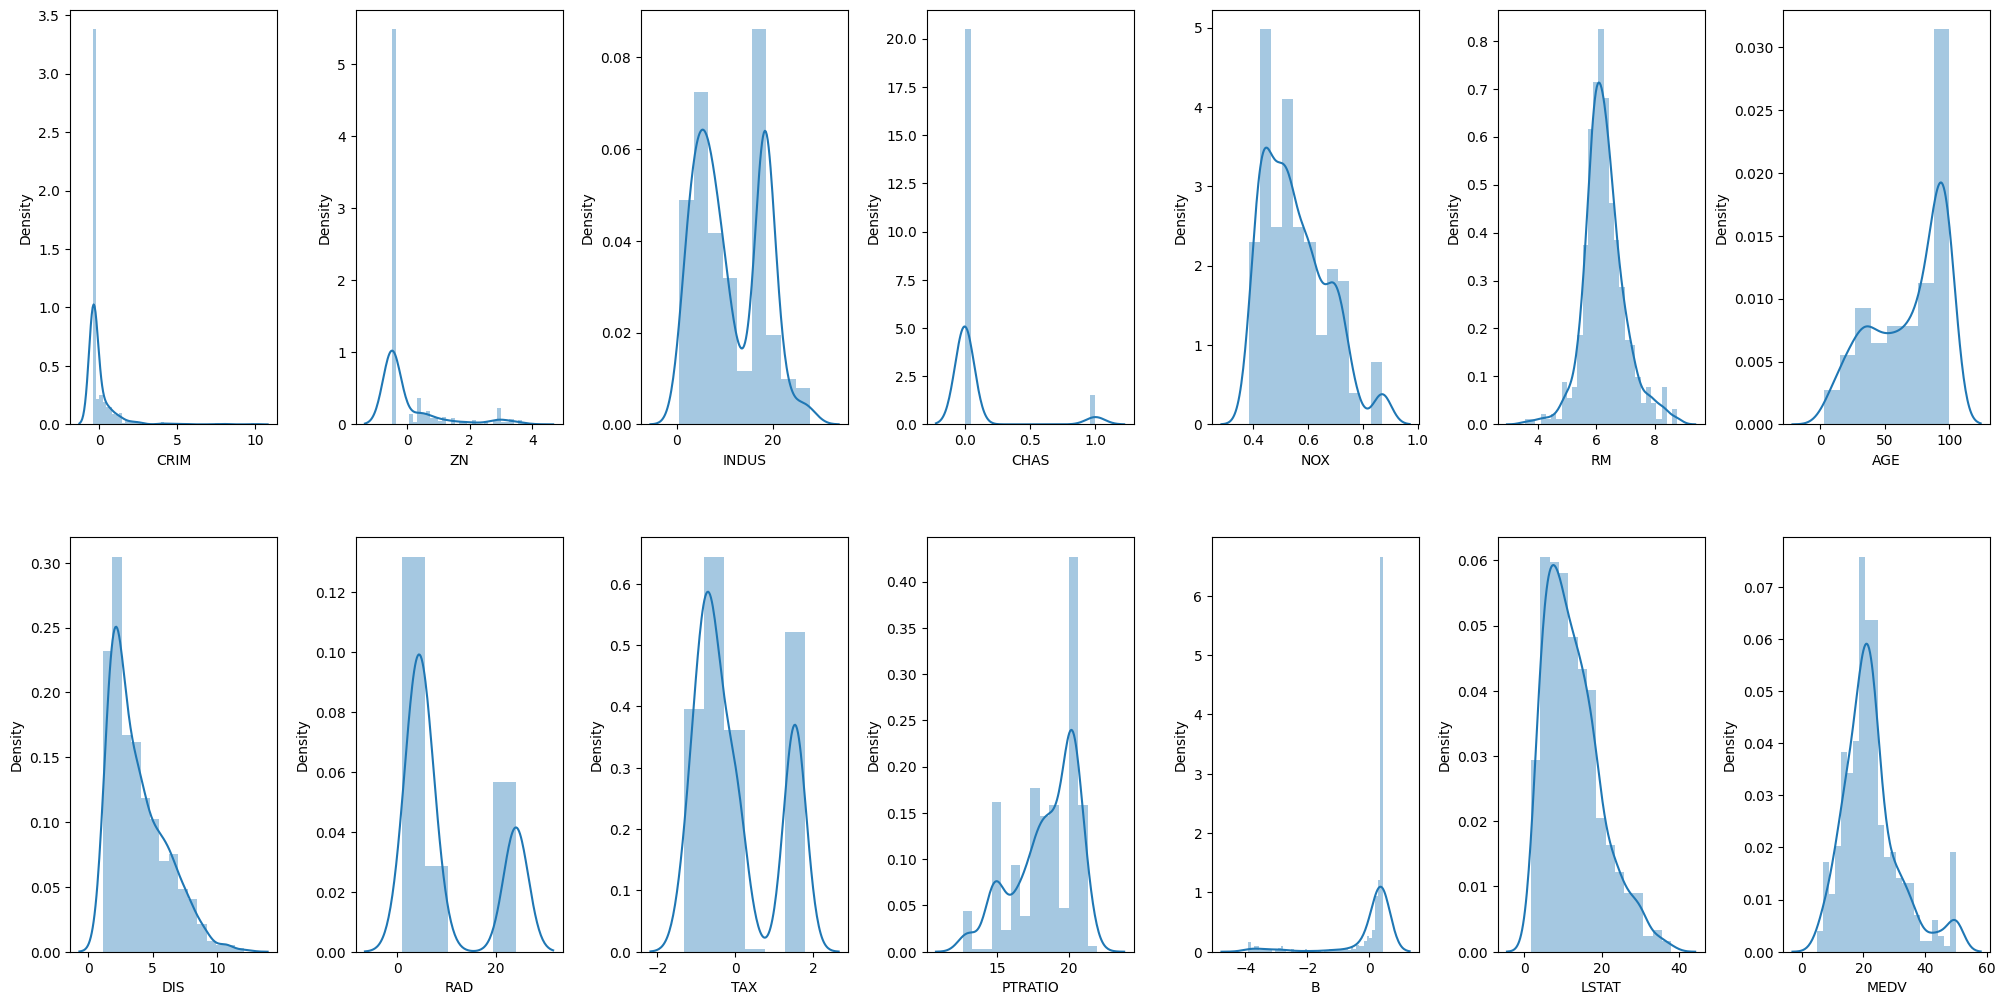

In [72]:
#create dist plot
fig, ax = plt.subplots(ncols = 7, nrows = 2 , figsize =(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value , ax = ax[index])
    index +=1
    #hyperparameter tunning
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0) 

## overfitting and underfitting
  ### types -  under-fitting,appropriate-fitting,over-fitting

# correlation matrix

<Axes: >

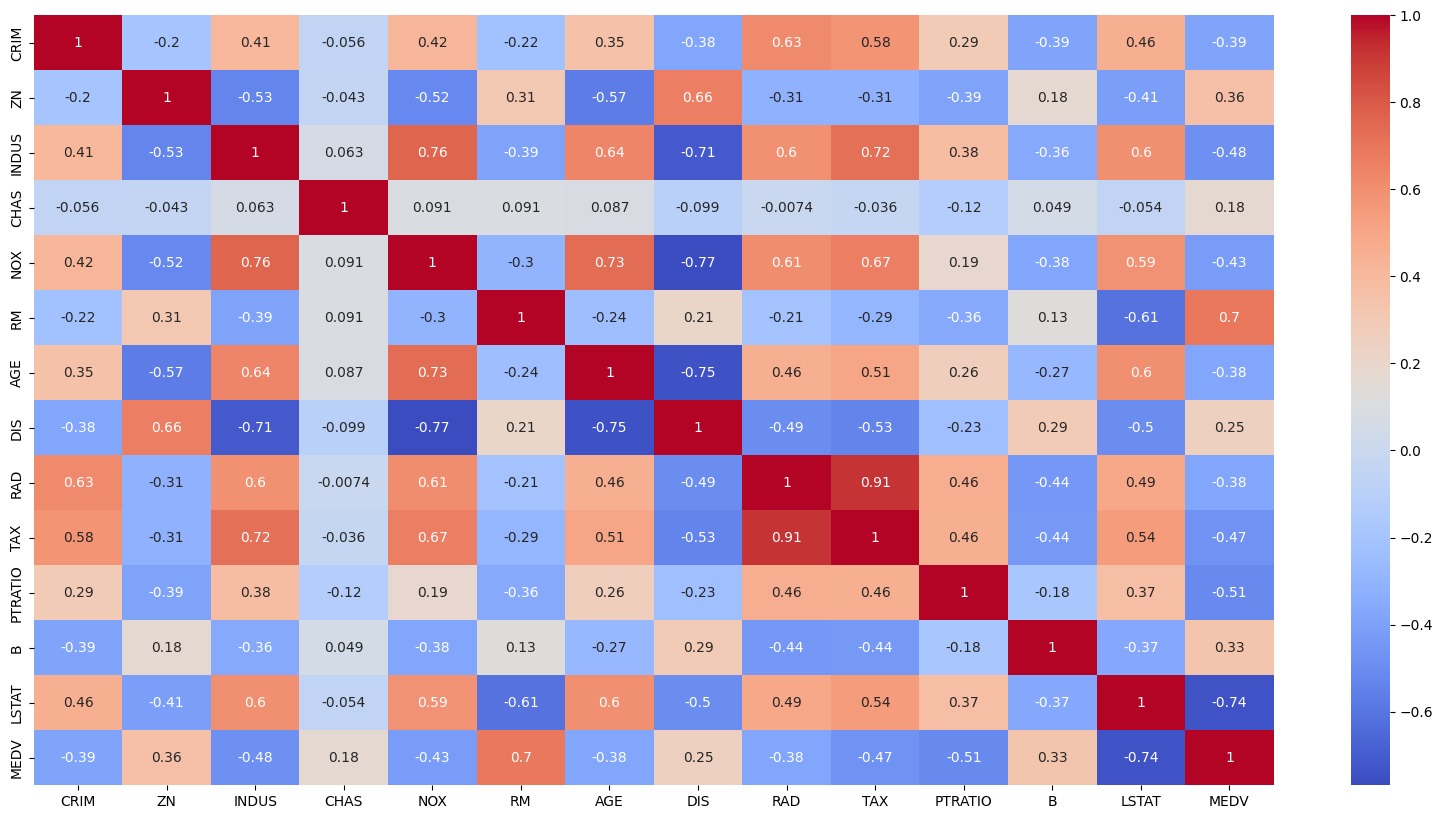

In [73]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

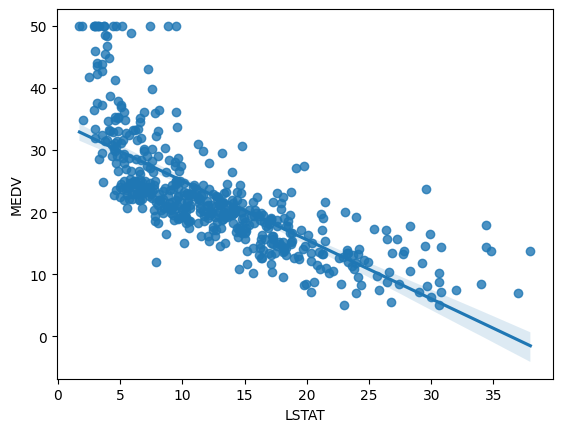

In [74]:
  sns.regplot(y=df['MEDV'],x=df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

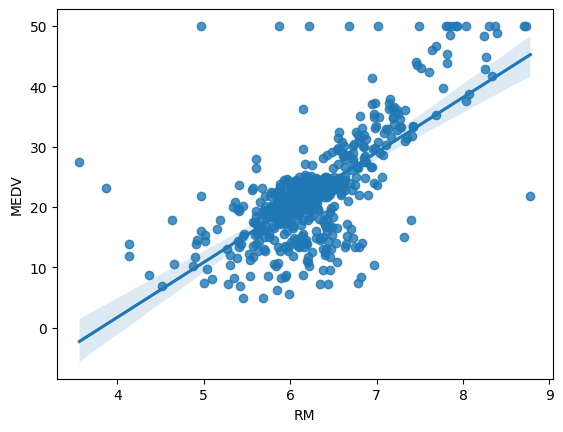

In [75]:
sns.regplot(y=df['MEDV'],x=df['RM'])

## INPUT SPLIT

In [76]:
X = df.drop(columns=['MEDV','RAD'],axis=1)
y= df['MEDV']

## MODEL TRAINING

In [77]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,y):

  #train the model
  x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)
    
  model.fit(x_train,y_train)
    
  #predict the training set
  pred = model.predict(x_test)

  #perform cross-validation
  cv_score = cross_val_score(model,X,y,scoring='reg_mean_squared_error',cv=S)
  cv_score = np.abs(np.mean(cv_score))

  print("Model Report")
  print("MSE:",mean_squared_error(y,pred))
  print("CV Score",cv_score)  

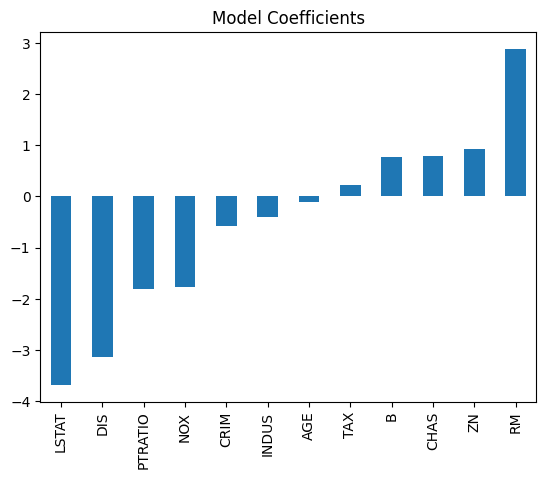

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Build pipeline: normalize → linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train the model
pipeline.fit(X, y)

# Extract coefficients
coef = pd.Series(
    pipeline.named_steps['model'].coef_,
    index=X.columns
).sort_values()

# Plot coefficients
coef.plot(kind='bar', title='Model Coefficients')
plt.show()



Model Report
------------
Training MSE : 22.8418
CV MSE (5-fold) : 35.5814


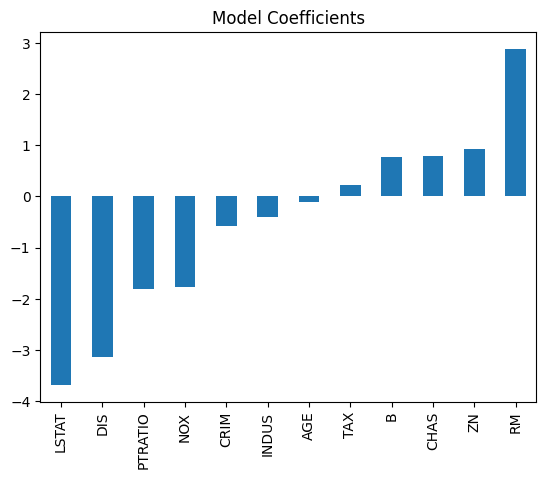

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build pipeline: scaling + linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X, y)

# ----- Model evaluation -----

# Cross-validation (5-fold)
cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Convert to positive MSE
cv_mse = -cv_scores
mean_cv_mse = np.mean(cv_mse)

# Training MSE
y_pred = pipeline.predict(X)
train_mse = mean_squared_error(y, y_pred)

print("Model Report")
print("------------")
print(f"Training MSE : {train_mse:.4f}")
print(f"CV MSE (5-fold) : {mean_cv_mse:.4f}")

# ----- Coefficient analysis -----

coef = pd.Series(
    pipeline.named_steps['model'].coef_,
    index=X.columns
).sort_values()

coef.plot(kind='bar', title='Model Coefficients')
plt.show()


In [83]:
# Create a DataFrame to view the coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Sort by absolute values to see the most important features first
print("--- How much each feature changes the House Price ---")
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False))

--- How much each feature changes the House Price ---
         Coefficient
NOX       -17.202633
RM          4.438835
CHAS        2.784438
TAX        -1.792605
DIS        -1.447865
B           1.126499
CRIM       -0.971494
PTRATIO    -0.915456
ZN          0.701556
LSTAT      -0.508571
RAD         0.262430
INDUS       0.040381
AGE        -0.006296


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Target (y)
# (Make sure 'MEDV' is the name of your Price column)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the 'model'
model = LinearRegression()  # <--- This line defines 'model'
model.fit(X_train, y_train)

print("Model successfully trained!")

Model successfully trained!


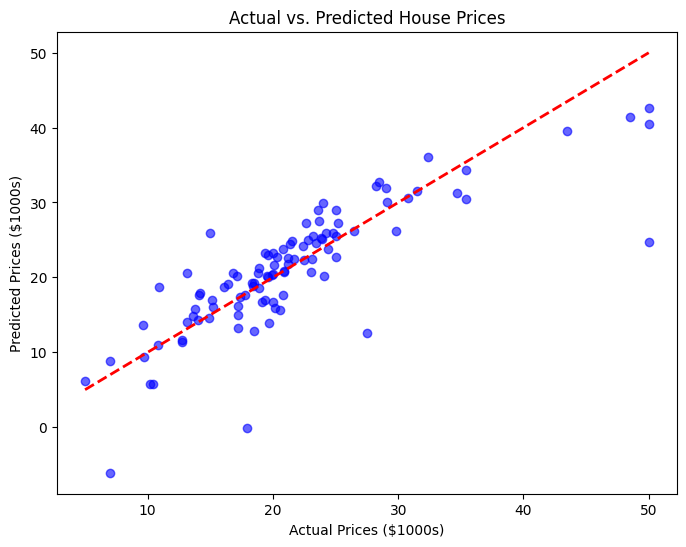

In [87]:
# 1. GENERATE PREDICTIONS (This is the missing line!)
predictions = model.predict(X_test)

# 2. Now the plotting code will work
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # The perfect prediction line
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs. Predicted House Prices")
plt.show()